In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

import tensorflow as tf
from PIL import Image

import imutils
from imutils.perspective import four_point_transform
from skimage.segmentation import clear_border

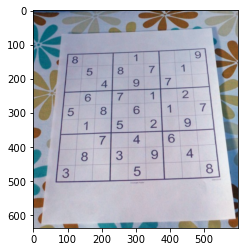

In [36]:
img = cv.imread('new_su.jpg')
img = cv.resize(img,(600, int(600 * img.shape[0] / img.shape[1])))
plt.imshow(img, cmap= 'gray')

In [34]:
def get_puzzle(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (3, 3), cv.BORDER_DEFAULT)
#     thresh = cv.adaptiveThreshold(blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 1, 11, 2)
    thresh = cv.adaptiveThreshold(blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    thresh = cv.bitwise_not(thresh)
    
    cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)
    # initialize a contour that corresponds to the puzzle outline
    puzzleCnt = None
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points, then we can
        # assume we have found the outline of the puzzle
        if len(approx) == 4:
            puzzleCnt = approx
            break

#     output = img.copy()
#     cv.drawContours(output, [puzzleCnt], -1, (0, 255, 0), 2)
#     # plt.imshow(output, cmap= 'gray')

    puzzle = four_point_transform(img, puzzleCnt.reshape(4, 2))
    warped = four_point_transform(gray, puzzleCnt.reshape(4, 2))
    
    return (puzzle, warped)

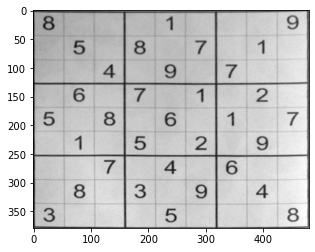

In [37]:
puzzle, warped = get_puzzle(img)
plt.imshow(warped, cmap= 'gray')

In [5]:
new_model = load_model('mnist_digits.h5')

In [6]:
def prediction(image, new_model):
    classes = np.argmax(new_model.predict(image), axis= -1)
    return classes[0]

In [7]:
def getCellPositions(img_extract):
    cell_positions = []
    
    cell_width = img_extract.shape[1] // 9
    cell_height = img_extract.shape[0] // 9
    
    startX, endX, startY, endY = 0,0,0,0
    
    for i in range(9):
        endY = startY + cell_height
        startX = 0
        for j in range(9):
            endX = startX + cell_width
            current_cell = [startX, endX, startY, endY]
            cell_positions.append(current_cell)
            startX = endX
        startY = endY
    return cell_positions

In [38]:
getCellPositions(warped)[:20]

[[0, 53, 0, 42],
 [53, 106, 0, 42],
 [106, 159, 0, 42],
 [159, 212, 0, 42],
 [212, 265, 0, 42],
 [265, 318, 0, 42],
 [318, 371, 0, 42],
 [371, 424, 0, 42],
 [424, 477, 0, 42],
 [0, 53, 42, 84],
 [53, 106, 42, 84],
 [106, 159, 42, 84],
 [159, 212, 42, 84],
 [212, 265, 42, 84],
 [265, 318, 42, 84],
 [318, 371, 42, 84],
 [371, 424, 42, 84],
 [424, 477, 42, 84],
 [0, 53, 84, 126],
 [53, 106, 84, 126]]

In [9]:
# plt.imshow(warped[0: 37, 228: 266], cmap= 'gray')

In [10]:
# thresh = cv.threshold(warped[0: 37, 228: 266], 0, 255, cv.THRESH_BINARY_INV| cv.THRESH_OTSU)[1]
# thresh = clear_border(thresh)
# cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)

#     # otherwise, find the largest contour in the cell and create a
#     # mask for the contour
# c = max(cnts, key=cv.contourArea)
# mask = np.zeros(thresh.shape, dtype="uint8")
# cv.drawContours(mask, [c], -1, 255, -1)
    
#     # compute the percentage of masked pixels relative to the total
#     # area of the image
# (h, w) = thresh.shape
# percentFilled = cv.countNonZero(mask) / float(w * h)
# # if less than 3% of the mask is filled then we are looking at
#     # noise and can safely ignore the contour

#     # apply the mask to the thresholded cell
# digit = cv.bitwise_and(thresh, thresh, mask=mask)

# plt.imshow(digit, cmap= 'gray')

In [11]:
# roi = cv.resize(digit, (28, 28))
# plt.imshow(roi, cmap= 'gray')
# roi = roi.astype("float") / 255.0
# roi = img_to_array(roi)
# roi = np.expand_dims(roi, axis=0)
# prediction(roi, new_model)

In [12]:
# roi = cv.resize(digit, (28, 28))
# plt.imshow(roi, cmap= 'gray')
# roi = roi.astype("float") / 255.0
# roi = img_to_array(roi)
# roi = np.expand_dims(roi, axis=0)
# prediction(roi, new_model)

In [13]:
# thresh = cv.threshold(warped[185: 222, 76: 114], 0, 255, cv.THRESH_BINARY_INV| cv.THRESH_OTSU)[1]
# thresh = clear_border(thresh)
# cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)

#     # otherwise, find the largest contour in the cell and create a
#     # mask for the contour
# c = max(cnts, key=cv.contourArea)
# mask = np.zeros(thresh.shape, dtype="uint8")
# cv.drawContours(mask, [c], -1, 255, -1)
    
#     # compute the percentage of masked pixels relative to the total
#     # area of the image
# (h, w) = thresh.shape
# percentFilled = cv.countNonZero(mask) / float(w * h)
# # if less than 3% of the mask is filled then we are looking at
#     # noise and can safely ignore the contour

#     # apply the mask to the thresholded cell
# digit = cv.bitwise_and(thresh, thresh, mask=mask)

# plt.imshow(digit, cmap= 'gray')

In [14]:
def extract_digit(img):
    thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV| cv.THRESH_OTSU)[1]
    thresh = clear_border(thresh)
    
    cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) == 0:
        return None
    # otherwise, find the largest contour in the cell and create a
    # mask for the contour
    c = max(cnts, key=cv.contourArea)
    mask = np.zeros(thresh.shape, dtype= "uint8")
    cv.drawContours(mask, [c], -1, 255, -1)
    
    # compute the percentage of masked pixels relative to the total
    # area of the image
    (h, w) = thresh.shape
    percentFilled = cv.countNonZero(mask) / float(w * h)
    # if less than 3% of the mask is filled then we are looking at
    # noise and can safely ignore the contour
    if percentFilled < 0.022:
        return None
    # apply the mask to the thresholded cell
    digit = cv.bitwise_and(thresh, thresh, mask=mask)
    # check to see if we should visualize the masking step
    # return the digit to the calling function
    return digit

In [15]:
def predictDigit(cell, img_extract, new_model):
    img_extract = img_extract[cell[2] : cell[3], cell[0] : cell[1]]
    digit = extract_digit(img_extract)
    if digit is not None:
        # resize the cell to 28x28 pixels and then prepare the
        # cell for classification
        roi = cv.resize(digit, (28, 28))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        # classify the digit and update the Sudoku board with the
        # prediction
        result = prediction(roi, new_model)
        return result
    else:
        return 0

In [16]:
def extractSudokuDigits(img_extract, new_model):
    #we start looking at the middle of the cell as this is where the sudoku digit should be at
    cell_digits, num = [], 0
    cells = getCellPositions(img_extract)
    for cell in range(len(cells)):
        num = predictDigit(cells[cell],img_extract, new_model)
        cell_digits.append(num)
    n = 9
    cell_digits = [cell_digits[i:i+n] for i in range(0, len(cell_digits), n)] 
    return cell_digits

In [39]:
#testing the extraction process for one sudoku picture
a = extractSudokuDigits(warped, new_model)
a

[[8, 0, 0, 0, 1, 0, 0, 0, 9],
 [0, 5, 0, 8, 0, 7, 0, 1, 0],
 [0, 0, 4, 0, 9, 0, 7, 0, 0],
 [0, 6, 0, 7, 0, 1, 0, 2, 0],
 [5, 0, 8, 0, 6, 0, 1, 0, 7],
 [0, 1, 0, 5, 0, 2, 0, 9, 0],
 [0, 0, 7, 0, 4, 0, 6, 0, 0],
 [0, 8, 0, 3, 0, 9, 0, 4, 0],
 [3, 0, 0, 0, 5, 0, 0, 0, 8]]

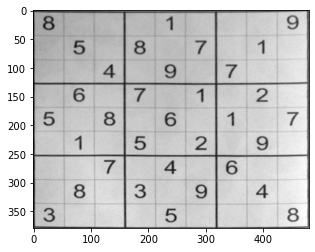

In [40]:
plt.imshow(warped,cmap='gray')

In [41]:
grid = ''
for i in range(9):
    for j in range(9):
        grid += str(a[i][j])
        
grid

'800010009050807010004090700060701020508060107010502090007040600080309040300050008'